# Introduction

This project deal with a text classification problem through using statisitcal models and deep learning models. In statistical models, I applied logistic,svm,xgb...; in deep learning model, CNN and transformer

The dataset is Corona Virus Tagged Data in kaggle(https://www.kaggle.com/datatattle/covid-19-nlp-text-classification). 
[SIMPLE INTRO TO THE DATA SET]
columns
labels
text


Since the dataset is imbalanced, to balance the data is a necessary step.In statistical models, I used a well-recognized method of the combination of oversampling and undersampling，namely, SMOTE oversampling and Tomek Links undersampling; and in deep learning model part,I used a common way, that is to assign an apt weight to each class by class-label-count.

The training and evalucation of model is only to follow the normal process in mahchine learning, which is not hard. However, the really messy is the stage of data preprocessing,which is presented in mainly two aspects. Firstly,there are many characters not needed and removing them needs design and search various string patterns. The second is more difficult, doing the preprocessing is quite time-consuming, and in the project,I have to sample a small part of the dataset for a quick demonstration. For the preprocessing step in the project, an efficient solution is to clean the data to have no uncessay symbals and then do the tokenization,using the command line tools like awk, and better to do the job parallelly. Regretly, I can't do the solution in the project, due to lacking necessay equipment support. One thing worth a mention, data clearning, as a quite systematic part in modeling, if being done well, can have better driving force in improving model effect, even than only optimizing algorithms.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
#-------------------------------------------------------------------------------------------------------------------
import string
import re
import spacy
import contextualSpellCheck ##!pip install contextualSpellCheck  ## dbutils.library.installPyPI("contextualSpellCheck")
# Load the English library from SpaCy
nlp = spacy.load("en_core_web_sm",disable=["ner"]  # "parser",
                ) # #!python -m spacy download en_core_web_sm
#nlp.add_pipe("contextual spellchecker", config={"max_edit_dist": 5}) 
contextualSpellCheck.add_to_pipe(nlp)

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

In [ ]:
#from wordcloud import WordCloud, STOPWORDS

In [ ]:
#!pip install -U wordcloud
#!pip install -U contextualSpellCheck
#!pip install -U spacy
#!pip install -U imblearn
#!python -m spacy download en_core_web_sm
#dbutils.library.installPyPI("imblearn")
#from imblearn.combine import SMOTETomek 
#dbutils.library.installPyPI("scikit-learn",version='1.0.1')
#!pip install -U scikit-learn
#dbutils.library.installPyPI("contextualSpellCheck")
#!pip install matplotlib==3.5
#dbutils.library.installPyPI("seaborn",version="0.11.2")
#!pip install -U spacy
#!pip install -U seaborn==0.11.2
#dbutils.library.installPyPI("xgboost",version="1.5.1")
#!pip install -U xgboost
#dbutils.library.installPyPI("spacy")
#dbutils.library.installPyPI("seaborn", version="0.11.2" )
#dbutils.library.restartPython()
#!pip install -U xgboost=1.5.0
#!pip install "https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz"
#!python -m spacy download en_core_web_sm
#!pip install -U xgboost#, --disable-pip-version-check

#!pip uninstall spacy
#!pip install --upgrade numpy
#import xgboost
#!pip install --upgrade xgboost
#dbutils.library.installPyPI("xgboost") # , version="<xgboost version>" 
#!pip uninstall xgboost
#dbutils.library.restartPython()
#import xgboost


     |████████████████████████████████| 366 kB 4.1 MB/s 
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.5.0
    Uninstalling wordcloud-1.5.0:
      Successfully uninstalled wordcloud-1.5.0
     |████████████████████████████████| 132 kB 4.2 MB/s 
     |████████████████████████████████| 3.4 MB 33.4 MB/s 
     |████████████████████████████████| 6.0 MB 51.7 MB/s 
     |████████████████████████████████| 628 kB 46.4 MB/s 
     |████████████████████████████████| 451 kB 43.6 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 181 kB 51.8 MB/s 
     |████████████████████████████████| 10.1 MB 46.0 MB/s 
     |████████████████████████████████| 596 kB 58.7 MB/s 
     |████████████████████████████████| 895 kB 44.9 MB/s 
     |████████████████████████████████| 61 kB 489 kB/s 
     |████████████████████████████████| 3.3 MB 38.7 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    

In [ ]:
from google.colab import drive  #---------------------------
drive.mount('/content/drive/')

Mounted at /content/drive/


Data reading and showing the dimensionality

In [ ]:
# the so-called original data, too much time to extract features, so comes the sampling next
#train_0 = pd.read_csv("/dbfs/FileStore/shared_uploads/ha-yeche@electrolux365.onmicrosoft.com/Corona_NLP_train-1.csv",encoding='latin_1')
#test_0 = pd.read_csv("/dbfs/FileStore/shared_uploads/ha-yeche@electrolux365.onmicrosoft.com/Corona_NLP_test-1.csv",encoding='latin_1')

train_addr='/content/drive/MyDrive/Colab Notebooks/TM_Projs/Corona_NLP_train.csv'
test_addr= '/content/drive/MyDrive/Colab Notebooks/TM_Projs/Corona_NLP_test.csv'
train_0 = pd.read_csv(train_addr,encoding='latin_1')
test_0 = pd.read_csv(test_addr,encoding='latin_1')


print(train_0.shape)
print(test_0.shape)

(41157, 6)
(3798, 6)


In [ ]:
#For convenience to using models in later parts, I add a coloumn with numbers, which is 1to1-map to the Sentiment lables
class_number = {"Extremely Negative":0,"Negative":1,"Neutral":2, "Positive":3,"Extremely Positive":4}
train_0['Sentiment_number'] = train_0['Sentiment'].map(class_number)
test_0['Sentiment_number'] = test_0['Sentiment'].map(class_number)
train_0.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Sentiment_number
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,2
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,3
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,3
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,3
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,0


In [ ]:
# sampling proportional to original size,
tr_r=0.05#0.0025
te_r=0.1#0.05
train = train_0.groupby('Sentiment').apply(lambda x: x.sample(frac=tr_r,random_state=123))  #0.05
test = test_0.groupby('Sentiment').apply(lambda x: x.sample(frac=te_r,random_state=123))  #0.1
train=train.reset_index(drop=True)
test=test.reset_index(drop=True)
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Sentiment_number
0,40897,85849,"South West, England",10-04-2020,@CornwallLive I was in my local supermarket ye...,Extremely Negative,0
1,14860,59812,NaN,20-03-2020,Coronavirus UK: Panic-buyers leave the vulnera...,Extremely Negative,0
2,41795,86747,NaN,11-04-2020,Crisis averted,Extremely Negative,0
3,16255,61207,NaN,21-03-2020,The shortage has become so emblematic of the c...,Extremely Negative,0
4,35066,80018,the land,06-04-2020,@the_teasmith @Veg_Co @TheGBFoodHub working on...,Extremely Negative,0


In [ ]:
print(train.shape)
print(test.shape)

(2058, 7)
(380, 7)


# Data Exploring 

After checking data missing, only location is not complete. So lucky it is needless.

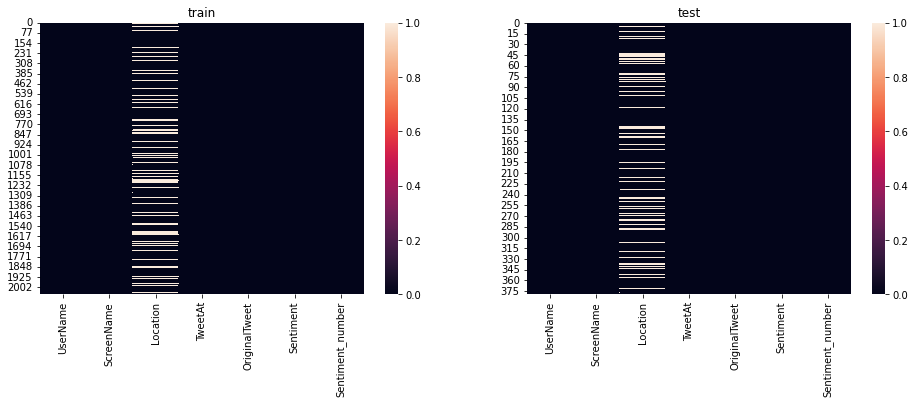

In [ ]:
plt.rcParams["figure.figsize"] = (16,5) 
plt.subplot(121)
sns.heatmap(train.isnull())
plt.title("train")
plt.subplot(122)
sns.heatmap(test.isnull())
plt.title("test")
display()

Seeing the label count of each class, the labels are imbalanced.So it is necessary to make it balanced. 

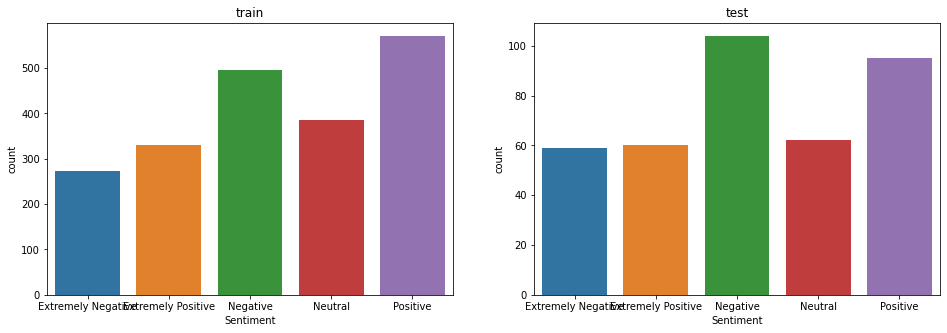

In [ ]:
plt.rcParams["figure.figsize"] = (16,5) 
plt.subplot(121)
sns.countplot(x=train['Sentiment'])
plt.title("train")
plt.subplot(122)
sns.countplot(x=test['Sentiment'])
plt.title("test")
#plt.show()
display()

In [ ]:
print("----train--------------------------------------------")
print(train.groupby('Sentiment').count().iloc[:,[4]]) 
print("----test--------------------------------------------")
print(test.groupby('Sentiment').count().iloc[:,[4]])

----train--------------------------------------------
                    OriginalTweet
Sentiment                        
Extremely Negative            274
Extremely Positive            331
Negative                      496
Neutral                       386
Positive                      571
----test--------------------------------------------
                    OriginalTweet
Sentiment                        
Extremely Negative             59
Extremely Positive             60
Negative                      104
Neutral                        62
Positive                       95


 Then the next groups of visualizations are used to show the basic quantitative information on characters, words,word length,..., which are used to show the data's scale.

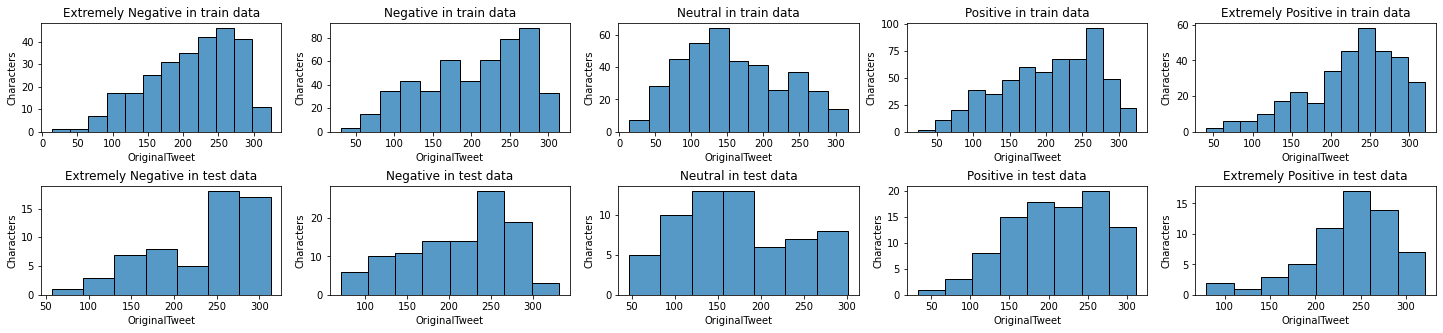

In [ ]:
class_label = ["Extremely Negative","Negative","Neutral","Positive","Extremely Positive"]
p_r=2   # plot rows for subplots
p_c=5   # ~col~
d=5
row=0
#-------------------------------------------
plt.subplots_adjust(wspace=0.2)
plt.subplots_adjust(hspace=0.5)
for col in range(p_c):  
  plt.subplot2grid((p_r,p_c),(row, col))
  plt.rcParams["figure.figsize"] = (25,5) 
  #---train
  tweet_len=train[train['Sentiment']==class_label[col]]['OriginalTweet'].str.len()
  sns.histplot(x=tweet_len)
  plt.ylabel("Characters")
  plt.title(class_label[col]+" in train data")
  #-----------
  plt.subplot2grid((p_r,p_c),(row+1, col))
  tweet_len=test[test['Sentiment']==class_label[col]]['OriginalTweet'].str.len()
  sns.histplot(x=tweet_len)
  plt.ylabel("Characters")
  plt.title(class_label[col]+" in test data")

display()

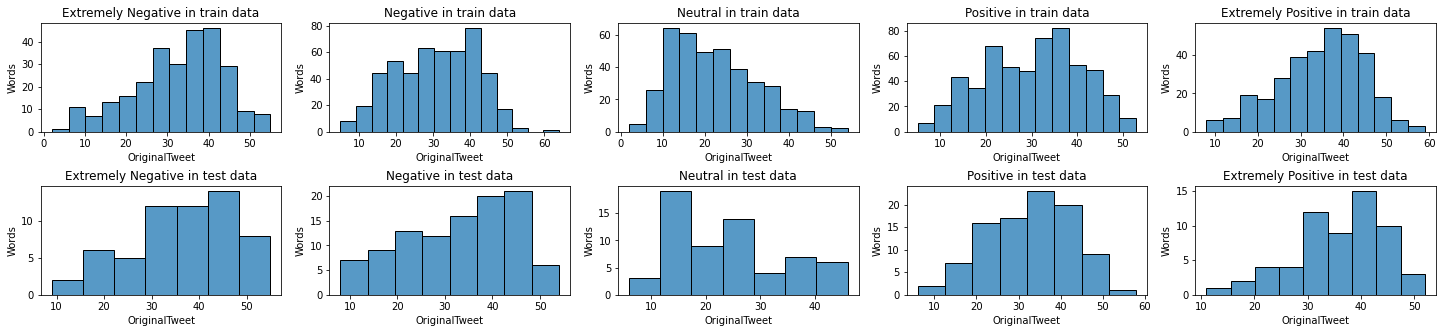

In [ ]:
class_label = ["Extremely Negative","Negative","Neutral","Positive","Extremely Positive"]
p_r=2   # plot rows for subplots
p_c=5   # ~col~
d=5
row=0
#for row in range(p_r):
plt.subplots_adjust(wspace=0.2)
plt.subplots_adjust(hspace=0.5)
for col in range(p_c):
  #----
  plt.subplot2grid((p_r,p_c),(row, col))
  plt.rcParams["figure.figsize"] = (25,5) 
  #---train-----------------------------------------------------------------------------------
  tweet_len=train[train['Sentiment']==class_label[col]]['OriginalTweet'].str.split().map(lambda x: len(x))
  sns.histplot(x=tweet_len)
  plt.ylabel("Words")
  plt.title(class_label[col]+" in train data")
  #---test--------------------------------------------------------------------------------
  plt.subplot2grid((p_r,p_c),(row+1, col))
  tweet_len=test[test['Sentiment']==class_label[col]]['OriginalTweet'].str.split().map(lambda x: len(x))
  sns.histplot(x=tweet_len)
  plt.ylabel("Words")
  plt.title(class_label[col]+" in test data")
  
display()

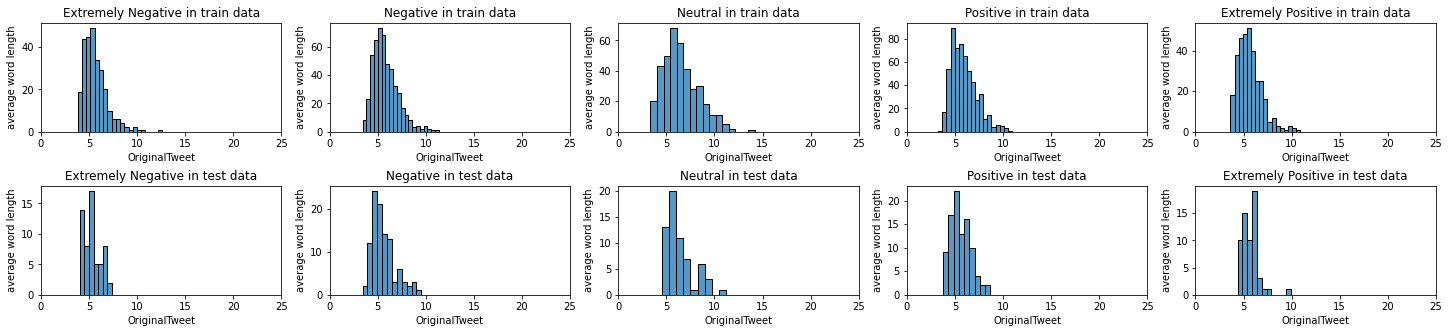

In [ ]:
## average word length
class_label = ["Extremely Negative","Negative","Neutral","Positive","Extremely Positive"]
p_r=2   # plot rows for subplots
p_c=5   # ~col~
d=5
row=0
#for row in range(p_r):
plt.subplots_adjust(hspace=0.5)
for col in range(p_c):
  #----
  plt.subplot2grid((p_r,p_c),(row, col))
  plt.rcParams["figure.figsize"] = (25,5) 
  #---train-----------------------------------------------------------------------------------
  word=train[train['Sentiment']==class_label[col]]['OriginalTweet'].str.split().apply(lambda x : [len(i) for i in x]) 
  sns.histplot(word.map(lambda x: np.mean(x)))
  plt.xlim((0, 25))
  plt.ylabel("average word length")
  plt.title(class_label[col]+" in train data")
  #---test--------------------------------------------------------------------------------
  plt.subplot2grid((p_r,p_c),(row+1, col))
  word=test[test['Sentiment']==class_label[col]]['OriginalTweet'].str.split().apply(lambda x : [len(i) for i in x]) 
  sns.histplot(word.map(lambda x: np.mean(x)))
  plt.xlim((0, 25))
  plt.ylabel("average word length")
  plt.title(class_label[col]+" in test data")
display()

In [ ]:
# keep in mind that world cloud
from wordcloud import WordCloud, STOPWORDS

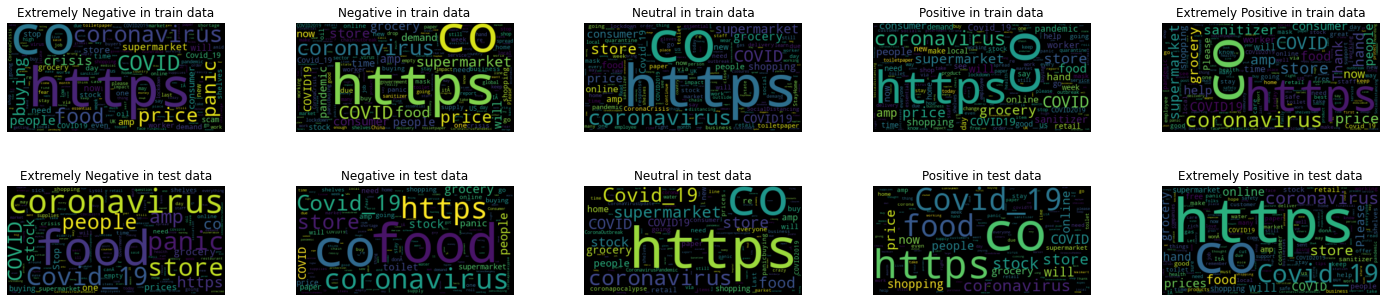

In [ ]:
class_label = ["Extremely Negative","Negative","Neutral","Positive","Extremely Positive"]
p_r=2   # plot rows for subplots
p_c=5   # ~col~
d=5
row=0
#for row in range(p_r):
plt.subplots_adjust(hspace=0.5)
for col in range(p_c):
  #----
  plt.subplot2grid((p_r,p_c),(row, col))
  plt.rcParams["figure.figsize"] = (25,5) 
  #---train-----------------------------------------------------------------------------------
  text=" ".join(train[train['Sentiment']==class_label[col]]['OriginalTweet'].to_list())
  wcld=WordCloud(collocations=False).generate(text)
  plt.imshow(wcld, interpolation="bilinear")
  plt.axis('off')
 
  plt.title(class_label[col]+" in train data")
  #---test--------------------------------------------------------------------------------
  plt.subplot2grid((p_r,p_c),(row+1, col))
  
  text=" ".join(test[test['Sentiment']==class_label[col]]['OriginalTweet'].to_list())
  wcld=WordCloud(collocations=False).generate(text)
  plt.imshow(wcld, interpolation="bilinear")
  plt.axis('off')
  plt.title(class_label[col]+" in test data")
display()

# Data Preprocssing

Introducing what are done in the stage.

In [ ]:
#proc_n =4
def spell_check(doc):
  #doc = nlp(doc)
  if doc._.performed_spellCheck:
    return nlp(doc._.outcome_spellCheck)#nlp.pipe(doc._.outcome_spellCheck,n_process=proc_n)
  else:
    return doc
  
# Create list of punctuation marks from string and  stopwords from spaCy
punctuations = string.punctuation
stopwords = spacy.lang.en.stop_words.STOP_WORDS

# Remove URLs ----------------------------
def remove_useless_symbol(text):
    #text = re.sub(r"\S*https?:\S*", "", text, flags=re.MULTILINE)
    #text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))'+, '', text, flags=re.MULTILINE)
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags = re.MULTILINE)   # url
    text = re.sub("@[A-Za-z0-9_]+","", text)  # mentions
    text = re.sub("#[A-Za-z0-9_]+","", text)  # hashtags
    return text
  
###########################  
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"  #...various symbols...
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)  
    
# Creat tokenizer function
def preprocess(sentence):    
    # Create token object from spacy   
    
    
    doc = nlp(sentence)
    
    # Correct spelling
    tokens = spell_check(doc)
    #tokens=doc

    # Lemmatize each token and convert each token into lowercase
    tokens = [word.lemma_.lower().strip() if word.lemma_ != "PROPN" else word.lower_ for word in tokens]  
    #tokens = [word.lemma_.lower().strip() for word in tokens] 
    # rm stopwords and punctuations
    tokens = [word for word in tokens if word not in stopwords and word not in punctuations]    
    # rm urls
    tokens = [remove_useless_symbol(word) for word in tokens]  
    # rm emoji
    tokens = [remove_emoji(word) for word in tokens]  
    #print(tokens)
    # return the final preprocessed taokens
    return tokens

In [ ]:
X_train_1, y_train = train['OriginalTweet'],train['Sentiment_number']
X_test_1, y_test =test['OriginalTweet'],test['Sentiment_number']

In [ ]:
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
cnt_vec = CountVectorizer(tokenizer=preprocess,ngram_range=(1,2))
#cnt_vec = CountVectorizer()
cnt_vec.fit(X_train_1)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


CountVectorizer(ngram_range=(1, 2),
                tokenizer=<function preprocess at 0x7ff3db328680>)

In [ ]:
# data
X_train_2 = cnt_vec.transform(X_train_1)
X_test_2 = cnt_vec.transform(X_test_1)

In [ ]:
#print(X_train_2[1])
#X_train_2.shape
#X_test_2.shape
#cnt_vec.inverse_transform(X_train_2)
#cnt_vec.inverse_transform(X_test_2)

# Imbalanced data and sampling

The assumption of classification, balanced

sampling

oversampling, def, merit, problems

undersampling, def, merit, problems

the combination

In [ ]:
# oversampling + undersampling
#dbutils.library.installPyPI("imblearn")
from imblearn.combine import SMOTETomek 
from imblearn.under_sampling import TomekLinks 

resample = SMOTETomek(tomek=TomekLinks())
#pipe_rsp = Pipeline(steps=[('r', resample)]) 

X_train_3, y_train_3 = resample.fit_resample(X_train_2, y_train)                  


# Statistical Models

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lg = LogisticRegression(random_state=202111, multi_class="multinomial", solver="lbfgs", max_iter=1000)
model_lg.fit(X_train_3, y_train_3)
pred_test = model_lg.predict(X_test_2)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.33      0.36      0.34        59
           1       0.31      0.25      0.28       104
           2       0.34      0.45      0.39        62
           3       0.33      0.36      0.34        95
           4       0.46      0.35      0.40        60

    accuracy                           0.34       380
   macro avg       0.35      0.35      0.35       380
weighted avg       0.35      0.34      0.34       380



In [ ]:
from sklearn.svm import LinearSVC
model_lsvc =  LinearSVC()
model_lsvc.fit(X_train_3, y_train_3)
pred_test = model_lsvc.predict(X_test_2)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.27      0.37      0.31        59
           1       0.34      0.25      0.29       104
           2       0.30      0.40      0.34        62
           3       0.36      0.28      0.32        95
           4       0.35      0.37      0.36        60

    accuracy                           0.32       380
   macro avg       0.32      0.34      0.32       380
weighted avg       0.33      0.32      0.32       380



## XGB

In [ ]:
from xgboost import XGBClassifier
#nlp.add_pipe('sentencizer')
#doc[i].is_sent_start

##############################################
model_xbg = XGBClassifier(objective="multi:softprob",use_label_encoder=False,random_state=202112)
model_xbg.fit(X_train_3, y_train_3)
pred_test = model_xbg.predict(X_test_2)
print(classification_report(y_test, pred_test))



              precision    recall  f1-score   support

           0       0.46      0.41      0.43        59
           1       0.33      0.15      0.21       104
           2       0.33      0.53      0.41        62
           3       0.27      0.40      0.32        95
           4       0.41      0.28      0.34        60

    accuracy                           0.34       380
   macro avg       0.36      0.36      0.34       380
weighted avg       0.35      0.34      0.33       380



# deep model

## data prepare

This step is to clear every sentence to the requirement as shown above. However, this work process is not so efficient, a better way is to rewrite the preprocessing function and make it do the clear work per sentence not per word.

In [ ]:
X_train_dp1=X_train_1.apply(lambda row : " ".join(preprocess(row)) )
X_test_dp1=X_test_1.apply(lambda row : " ".join(preprocess(row)) )

In [ ]:
### demonestration code
from keras.preprocessing.text import one_hot 
from keras.preprocessing.text import text_to_word_sequence 
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences 
# define the document 
text = 'The quick brown fox jumped over the lazy dog.' 
# estimate the size of the vocabulary 
words = set(text_to_word_sequence(text)) 
vocab_size = len(words) 
print(vocab_size) 
# integer encode the document 
result = one_hot(text, round(vocab_size*1.3)) 
print(result)
text_to_word_sequence(text)

8
[1, 8, 4, 5, 7, 5, 1, 1, 2]


['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']

In [ ]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences 

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train_dp1)

X_train_dp2 = tokenizer.texts_to_sequences(X_train_dp1)
X_test_dp2 = tokenizer.texts_to_sequences(X_test_dp1)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

maxlen = 100

X_train_dp3 = pad_sequences(X_train_dp2, padding='post', maxlen=maxlen)
X_test_dp3 = pad_sequences(X_test_dp2, padding='post', maxlen=maxlen)

In [ ]:
vocab_size

5006

In [ ]:
#y_tf = tf.keras.utils.to_categorical(a-1, num_classes = 5)
import tensorflow as tf
y_train_dp3=tf.keras.utils.to_categorical(y_train, num_classes=5)#pd.get_dummies(y_train).astype('float32').values 
y_test_dp3=tf.keras.utils.to_categorical(y_test, num_classes=5)#pd.get_dummies(y_test).astype('float32').values 

In [ ]:
print(X_train_dp1[1])
print(X_train_dp2[1])

uk panic buyer leave vulnerable food coronavirus 19 covid?19 covid_19 end coronavirusoutbreak rescue survival rescue s follow 
[72, 14, 456, 97, 207, 6, 5, 1, 2, 1, 2, 1, 190, 179, 712, 1032, 712, 20, 150]


## Balance the data

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
labs=np.unique(y_train)
#class_weights = compute_class_weight('balanced', np.unique(y_train), y_train)
class_weights = compute_class_weight(class_weight='balanced',classes=labs, y=y_train)
class_weights
weights_of_class={labs[i]:v for i, v in enumerate(class_weights)}
weights_of_class

{0: 1.5021897810218978,
 1: 0.8298387096774194,
 2: 1.066321243523316,
 3: 0.7208406304728546,
 4: 1.2435045317220543}

In [ ]:
# https://keras.io/api/metrics/classification_metrics/
######################################################
from keras.models import Sequential
from keras import layers

embedding_dim = 50
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(5, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           250300    
                                                                 
 flatten (Flatten)           (None, 5000)              0         
                                                                 
 dense (Dense)               (None, 10)                50010     
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
Total params: 300,365
Trainable params: 300,365
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train_dp3, y_train_dp3,
                   class_weight=weights_of_class,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test_dp3, y_test_dp3),
                    batch_size=20)



In [ ]:
def plot_results(history):
    
    loss = history.history['loss']
    acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

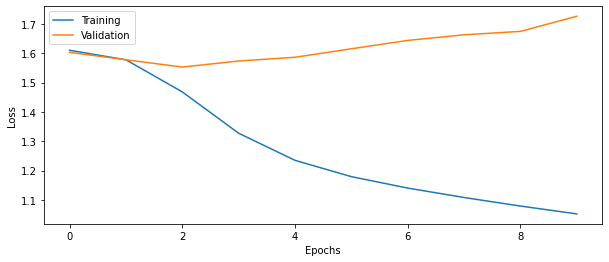

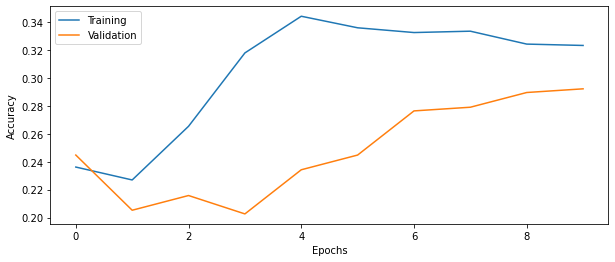

In [ ]:
plot_results(history)

In [ ]:
loss, accuracy = model.evaluate(X_train_dp3, y_train_dp3, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_dp3, y_test_dp3, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
#plot_history(history)

Training Accuracy: 0.3290
Testing Accuracy:  0.2921


## RNN

LSTM and GRU

In [ ]:
#def Bi_LSTM()

from keras.layers import LSTM, Bidirectional
def Bi_LSTM():
  model = Sequential()
  model.add(layers.Embedding(input_dim=vocab_size, 
                            output_dim=embedding_dim, 
                            input_length=maxlen))
  model.add(Bidirectional(LSTM(12, return_sequences=False, dropout=0.2) ))
  model.add(layers.Dense(5, activation='sigmoid'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  print(model.summary())
  return model

model_birnn = Bi_LSTM()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 50)           250300    
                                                                 
 bidirectional (Bidirectiona  (None, 24)               6048      
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 5)                 125       
                                                                 
Total params: 256,473
Trainable params: 256,473
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history_rnn = model_birnn.fit(X_train_dp3, y_train_dp3,
                   class_weight=weights_of_class,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test_dp3, y_test_dp3),
                    batch_size=20)

In [ ]:
# fit model
#model_birnn.fit([X_train_dp3,X_train_dp3,X_train_dp3,X_train_dp3], y_train_dp3, epochs=10, batch_size=16)

# evaluate model on training dataset
loss, acc = model_birnn.evaluate(X_train_dp3, y_train_dp3, verbose=0)
print('Train Accuracy: %f' % (acc*100))
 
# evaluate model on test dataset dataset
loss, acc = model_birnn.evaluate(X_test_dp3,y_test_dp3, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Train Accuracy: 98.056364
Test Accuracy: 38.947368


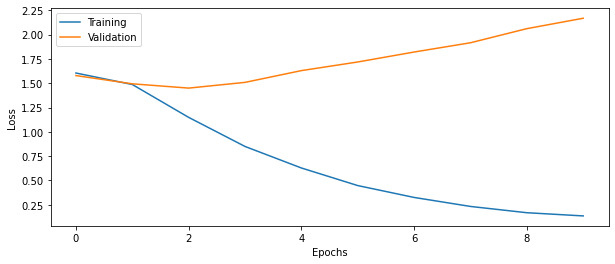

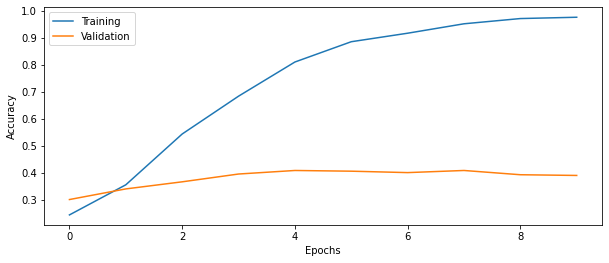

In [ ]:
plot_results(history_rnn)

## CNN
Apart from the limitation in paralell computing, RNN model, even for the well-known LSTM, still can't overcome the problem of long step information loss, it is also a main reason for RNN's being outdated especially in NLP.So in the part, RNN is not used

Considering the filter mechanism, as a way to train n-gram models, CNN can still
give acceptable effect. Here I try to develop a multichannel model by CNN

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate

In [ ]:
length=maxlen

def multi_channel_CNN(length, vocab_size):
  # channel 1
  inputs1 = Input(shape=(length,))
  embedding1 = Embedding(vocab_size, embedding_dim)(inputs1)
  conv1 = Conv1D(filters=32, kernel_size=2, activation='relu')(embedding1)
  drop1 = Dropout(0.5)(conv1)
  pool1 = MaxPooling1D(pool_size=2)(drop1)
  flat1 = Flatten()(pool1)
  # channel 2
  inputs2 = Input(shape=(length,))
  embedding2 = Embedding(vocab_size, embedding_dim)(inputs2)
  conv2 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding2)
  drop2 = Dropout(0.5)(conv2)
  pool2 = MaxPooling1D(pool_size=2)(drop2)
  flat2 = Flatten()(pool2)
  # channel 3
  inputs3 = Input(shape=(length,))
  embedding3 = Embedding(vocab_size, embedding_dim)(inputs3)
  conv3 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding3)
  drop3 = Dropout(0.5)(conv3)
  pool3 = MaxPooling1D(pool_size=2)(drop3)
  flat3 = Flatten()(pool3)
  # channel 4
  inputs4 = Input(shape=(length,))
  embedding4 = Embedding(vocab_size, embedding_dim)(inputs4)
  conv4 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding4)
  drop4 = Dropout(0.5)(conv4)
  pool4 = MaxPooling1D(pool_size=2)(drop4)
  flat4 = Flatten()(pool4)
  # merge the flats above
  merged = concatenate([flat1, flat2, flat3, flat4])
  # the so-called interpretation stage
  dense1 = Dense(16, activation='relu')(merged)
  outputs = Dense(5, activation='sigmoid')(dense1)
  model = Model(inputs=[inputs1, inputs2, inputs3, inputs4], outputs=outputs)
  # compile
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  # summarize
  print(model.summary())
  plot_model(model, show_shapes=True, to_file='multichannel.png')
  return model

# define model
model_cnn = multi_channel_CNN(length, vocab_size)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 100)]        0           []                               
                                                                                              

In [ ]:
history_cnn = model_cnn.fit([X_train_dp3,X_train_dp3,X_train_dp3,X_train_dp3], y_train_dp3,
                   class_weight=weights_of_class,
                    epochs=10,
                    verbose=False,
                    validation_data=([X_test_dp3,X_test_dp3,X_test_dp3,X_test_dp3], y_test_dp3),
                    batch_size=20)

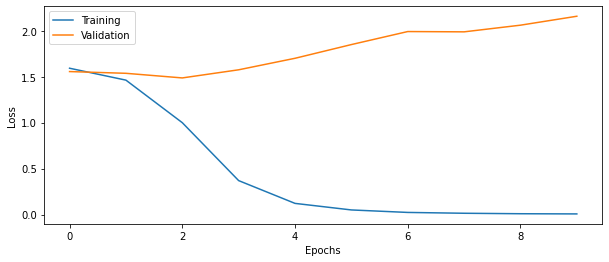

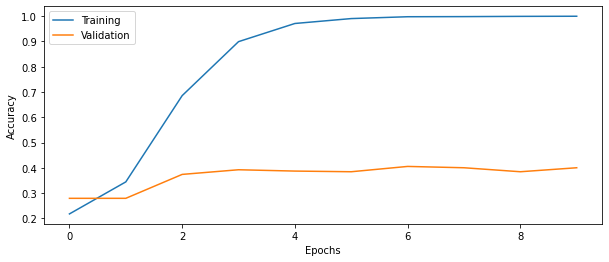

In [ ]:
plot_results(history_cnn)

In [ ]:
# fit model
#model_cnn.fit([X_train_dp3,X_train_dp3,X_train_dp3,X_train_dp3], y_train_dp3, epochs=10, batch_size=16)

# evaluate model on training dataset
loss, acc = model_cnn.evaluate([X_train_dp3, X_train_dp3, X_train_dp3,X_train_dp3], y_train_dp3, verbose=0)
print('Train Accuracy: %f' % (acc*100))
 
# evaluate model on test dataset dataset
loss, acc = model_cnn.evaluate([X_test_dp3,X_test_dp3,X_test_dp3,X_test_dp3],y_test_dp3, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Train Accuracy: 100.000000
Test Accuracy: 40.000001


## Transformer

Simply speaking, Transformer is essentially training a database model in which we can search wanted information.

The below code is modified from the page of keras,

The accuracy is , it is due to the data ,  underfit

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

###
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions


...word frequency cloud...and other visualization

In [ ]:
embedding_dim = 50  # Embedding size for each token
num_heads = 4  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embedding_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embedding_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(5, activation="softmax")(x)

trsfm_model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
trsfm_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

trsfm_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 100)]             0         
                                                                 
 token_and_position_embeddin  (None, 100, 50)          255300    
 g_4 (TokenAndPositionEmbedd                                     
 ing)                                                            
                                                                 
 transformer_block_4 (Transf  (None, 100, 50)          44132     
 ormerBlock)                                                     
                                                                 
 global_average_pooling1d_4   (None, 50)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_22 (Dropout)        (None, 50)                0   

In [ ]:
y_train_dp3
np.unique(y_train_dp3)

array([0., 1.], dtype=float32)

In [ ]:
history_trsfm = trsfm_model.fit(X_train_dp3, y_train_dp3,
                    class_weight=weights_of_class,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test_dp3, y_test_dp3),
                    batch_size=20)

In [ ]:
loss, accuracy = trsfm_model.evaluate(X_train_dp3, y_train_dp3, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = trsfm_model.evaluate(X_test_dp3, y_test_dp3, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9320
Testing Accuracy:  0.4026


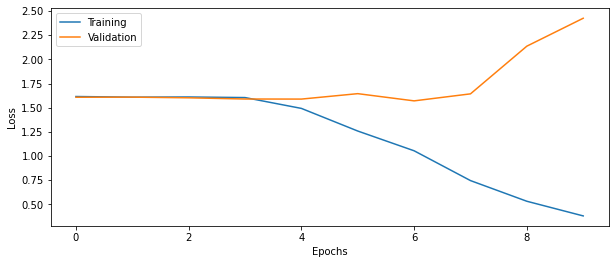

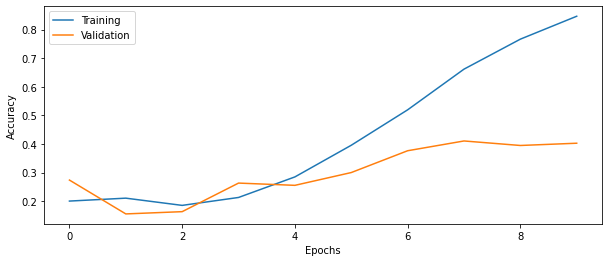

In [ ]:
plot_results(history_trsfm)